# Airbnb Analysis Project

Aim: To analyse prices and expected earnings from airbnb rental properties


In [62]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [76]:
listings_data = pd.read_csv("sydney/oct15/listings.csv", )
listings_data2 = pd.read_csv("sydney/oct15/listings2.csv", )

In [59]:
listings_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3669962,Views of the Pittwater,6515353,Robert,Pittwater,-33.650456,151.311718,Private room,95,1,13,2015-08-17,1.37,1,355
1,4849322,Do you enjoy a beaches lifestyle?,5409864,Annie,Pittwater,-33.708198,151.289642,Private room,85,1,10,2015-09-27,1.39,1,363
2,7699749,Relaxing Spacious Beach Retreat,40445574,Tania,Pittwater,-33.672962,151.313276,Entire home/apt,700,7,0,NaN,NaN,1,76
3,769911,Whale Beach Garden Retreat,465560,Elaine,Pittwater,-33.619487,151.337180,Entire home/apt,131,2,2,2012-12-11,0.06,4,322
4,7623002,Newport Beach Sydney Sun Catcher,19810434,Jill,Pittwater,-33.660680,151.313584,Entire home/apt,150,1,2,2015-08-23,1.05,1,90


In [77]:
listings_data2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3669962,https://www.airbnb.com/rooms/3669962,2.015100e+13,2/10/15,Views of the Pittwater,A spacious four bedroom house in quiet Bilgola...,NaN,A spacious four bedroom house in quiet Bilgola...,none,NaN,...,9,f,NaN,NaN,f,moderate,f,f,1,1.37
1,4849322,https://www.airbnb.com/rooms/4849322,2.015100e+13,2/10/15,Do you enjoy a beaches lifestyle?,My house is an Art Deco home with great views....,"The large, sunny room opens onto a balcony wit...",My house is an Art Deco home with great views....,none,I love the water.... so being close to both be...,...,9,f,NaN,NaN,f,flexible,f,f,1,1.39
2,7699749,https://www.airbnb.com/rooms/7699749,2.015100e+13,2/10/15,Relaxing Spacious Beach Retreat,This spacious house includes two large living ...,NaN,This spacious house includes two large living ...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3,769911,https://www.airbnb.com/rooms/769911,2.015100e+13,2/10/15,Whale Beach Garden Retreat,Cute cabin in tropical setting at the end of g...,"Welcome to our gorgeous, boutique B&B located ...",Cute cabin in tropical setting at the end of g...,none,NaN,...,8,f,NaN,NaN,f,flexible,f,f,4,0.06
4,7623002,https://www.airbnb.com/rooms/7623002,2.015100e+13,2/10/15,Newport Beach Sydney Sun Catcher,This private secondary dwelling in the leafy b...,The open plan living area combines a small din...,This private secondary dwelling in the leafy b...,none,The Northern Beaches is a hidden gem in Sydney...,...,9,f,NaN,NaN,f,moderate,f,f,1,1.05


In [89]:
listings_data2.corr(method='pearson', min_periods=40)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.561328,0.024544,0.024544,-0.003810,-0.031557,-0.037660,0.003978,-0.035724,...,-0.408247,-0.018180,0.007482,0.024097,-0.043264,-0.035494,0.008278,0.057040,-0.002450,0.234929
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.561328,NaN,1.000000,-0.167473,-0.167473,0.051171,-0.068619,-0.051320,0.016920,-0.032953,...,-0.235525,-0.013871,0.014745,0.012523,-0.013005,-0.019618,-0.013274,0.048728,-0.112776,0.148964
host_listings_count,0.024544,NaN,-0.167473,1.000000,1.000000,-0.055889,0.020037,0.196042,0.132041,0.170603,...,-0.071470,-0.097371,-0.065141,-0.052179,-0.171637,-0.183443,-0.041169,-0.103455,0.781344,-0.081873
host_total_listings_count,0.024544,NaN,-0.167473,1.000000,1.000000,-0.055889,0.020037,0.196042,0.132041,0.170603,...,-0.071470,-0.097371,-0.065141,-0.052179,-0.171637,-0.183443,-0.041169,-0.103455,0.781344,-0.081873
latitude,-0.003810,NaN,0.051171,-0.055889,-0.055889,1.000000,0.186723,0.144841,0.104338,0.166759,...,-0.021968,0.036052,0.011442,0.038309,0.021718,0.024810,0.007520,-0.003511,-0.070363,-0.038887
longitude,-0.031557,NaN,-0.068619,0.020037,0.020037,0.186723,1.000000,0.147232,0.059295,0.171213,...,-0.048570,0.032997,0.010568,-0.006078,0.029192,0.025817,0.179183,-0.028744,0.056405,-0.094301
accommodates,-0.037660,NaN,-0.051320,0.196042,0.196042,0.144841,0.147232,1.000000,0.608100,0.828170,...,-0.057345,-0.009351,-0.007354,-0.019967,-0.022800,-0.024407,0.011118,-0.064506,0.242065,-0.093684
bathrooms,0.003978,NaN,0.016920,0.132041,0.132041,0.104338,0.059295,0.608100,1.000000,0.603300,...,-0.085408,0.007788,-0.001707,-0.025348,-0.023055,-0.025478,-0.014871,-0.019809,0.158974,-0.108066
bedrooms,-0.035724,NaN,-0.032953,0.170603,0.170603,0.166759,0.171213,0.828170,0.603300,1.000000,...,-0.124107,0.037502,0.029959,0.000517,0.012372,0.009287,0.022840,-0.025506,0.195470,-0.186795


In [45]:
listings_data = listings_data.drop(['neighbourhood_group'], 1)

In [79]:
listings_data2 = listings_data2.drop(['license', 'jurisdiction_names', 'neighbourhood_group_cleansed'], 1)

In [73]:
listings_data2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3669962,https://www.airbnb.com/rooms/3669962,20151002120258,2015-10-02,Views of the Pittwater,A spacious four bedroom house in quiet Bilgola...,NaN,A spacious four bedroom house in quiet Bilgola...,none,NaN,...,10,10,9,f,f,moderate,f,f,1,1.37
1,4849322,https://www.airbnb.com/rooms/4849322,20151002120258,2015-10-02,Do you enjoy a beaches lifestyle?,My house is an Art Deco home with great views....,"The large, sunny room opens onto a balcony wit...",My house is an Art Deco home with great views....,none,I love the water.... so being close to both be...,...,10,10,9,f,f,flexible,f,f,1,1.39
2,7699749,https://www.airbnb.com/rooms/7699749,20151002120258,2015-10-02,Relaxing Spacious Beach Retreat,This spacious house includes two large living ...,NaN,This spacious house includes two large living ...,none,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
3,769911,https://www.airbnb.com/rooms/769911,20151002120258,2015-10-02,Whale Beach Garden Retreat,Cute cabin in tropical setting at the end of g...,"Welcome to our gorgeous, boutique B&B located ...",Cute cabin in tropical setting at the end of g...,none,NaN,...,10,9,8,f,f,flexible,f,f,4,0.06
4,7623002,https://www.airbnb.com/rooms/7623002,20151002120258,2015-10-02,Newport Beach Sydney Sun Catcher,This private secondary dwelling in the leafy b...,The open plan living area combines a small din...,This private secondary dwelling in the leafy b...,none,The Northern Beaches is a hidden gem in Sydney...,...,10,10,9,f,f,moderate,f,f,1,1.05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2077bf110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x24b082ad0>]], dtype=object)

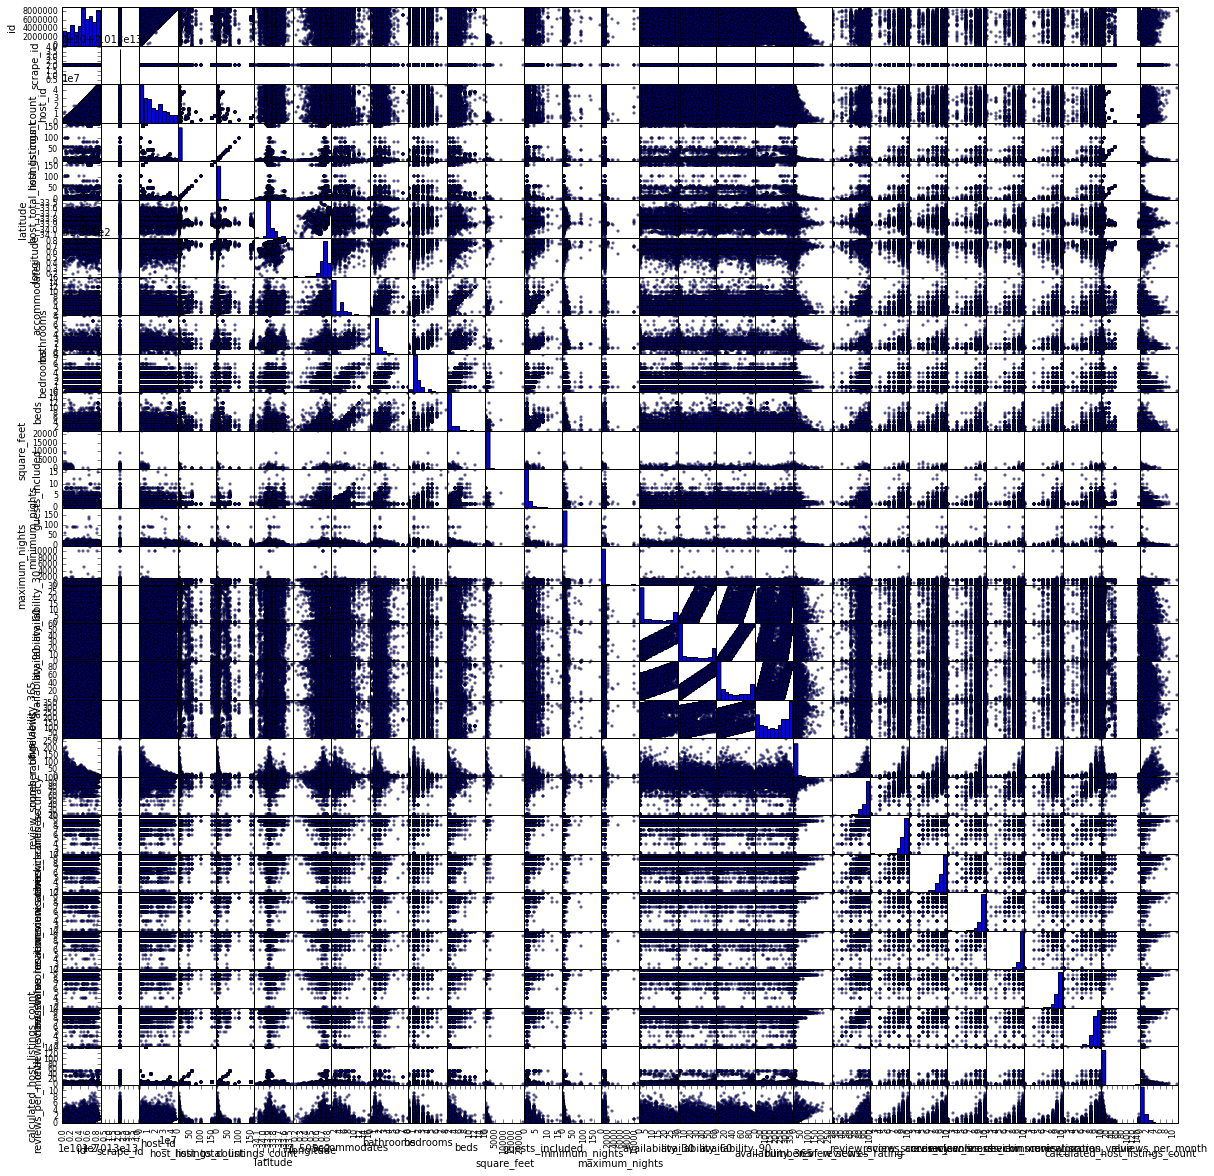

In [54]:
pd.scatter_matrix(listings_data2, figsize=(20,20))

In [145]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['accommodates','latitude','longitude']
X = listings_data2[feature_cols]
y = listings_data2.price
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
print linreg.intercept_
print linreg.coef_

-63488.4410656
[  68.4750546   119.20484879  446.38865826]


In [150]:
print linreg.predict([1,-33.61,151.28])

[ 103.23524195]


/Users/nishantkumar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


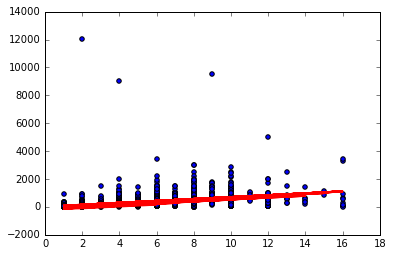

In [154]:
price_pred = linreg.predict(X)
plt.plot(listings_data2.accommodates, price_pred, color='red')

plt.scatter(listings_data2.accommodates, listings_data2.price)


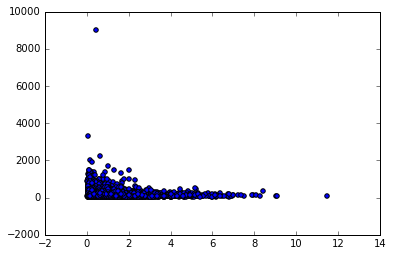

In [121]:
plt.scatter(listings_data2.reviews_per_month, listings_data2.price)